In [167]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

%matplotlib inline

In [168]:
ice = pd.read_csv("ice.csv")
ice.columns = ice.columns.str.replace(' ','') # enlever l'espace
ice = ice.drop('SourceData', axis=1)

iceN = ice[ice['hemisphere']=="north"]
iceS = ice[ice['hemisphere']=="south"]

Year - Année

Month - Mois

Day - Jour

Extent - Étendue mesurée en millions de km^2

Missing - Étendue manquante en millions de km^2

hemisphere - Hémisphère

Les données couvrent tous les jours du 26/10/1978 au 31/05/2019, à la fois pour les cryosphères nord et sud.

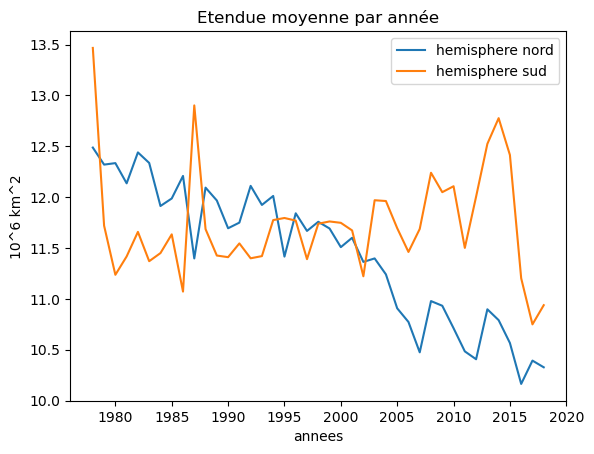

In [169]:
annees = list(range(1978, 2019))

extN = []
for i in range(1978, 2019):
    tmp = iceN[iceN["Year"] == i]
    extN.append(tmp["Extent"].mean())

extS = []
for i in range(1978, 2019):
    tmp = iceS[iceS["Year"] == i]
    extS.append(tmp["Extent"].mean())
    
annees_ext = pd.DataFrame({"annees":annees, "hemisphere nord":extN, "hemisphere sud":extS})

annees_ext.plot(x="annees", ylabel="10^6 km^2", title="Etendue moyenne par année")
plt.show()

L'hémisphère sud voit des changements de superficie de glace énormes au fur et à mesure des années, indiquant peut-être des problèmes de mesures ou des standards qui changent avec le temps puisqu'il s'agit de glace qui recouvre la terre et non flottante, on observe tout de même une perte de 2.5 millions de km^2 de superficie en 40 ans.

On observe cependant un déclin rapide quasi-constant en ce qui concerne l'hémisphère nord, qui perd plus de 2 millions de km^2 en 40 ans, ce qui laisse présager une fonte totale d'ici 200 ans ou moins, ce qui est une échelle de temps très courte.

In [171]:
pen = pd.read_excel("penguins.xlsx")

pen.columns = pen.columns.str.replace(' ','_')
pen = pen[['site_id','common_name','year','count', 'count_type']]
pen = pen.sort_values(by=['year'])
pen
#les mesures vont de 1982 à 2019

,site_id,common_name,year,count,count_type
118,PETE,gentoo penguin,1982,375,nests
117,PETE,chinstrap penguin,1982,0,nests
116,PETE,adelie penguin,1982,987,nests
63,ORNE,chinstrap penguin,1984,340,nests
0,NEKO,gentoo penguin,1987,397,chicks
...,...,...,...,...,...
113,ORNE,chinstrap penguin,2018,250,chicks
199,PETE,gentoo penguin,2018,3516,nests
60,NEKO,gentoo penguin,2019,953,nests
61,NEKO,gentoo penguin,2019,1058,nests


In [175]:
#séparation par site et espèce, seulement les nids
pen_adelie = pen[(pen['common_name'] == 'adelie penguin') & (pen['count_type'] == 'nests') & (pen['count'] >= 1) & (pen['site_id'] == 'PETE')]
pen_gentoo = pen[(pen['common_name'] == 'gentoo penguin') & (pen['count_type'] == 'nests') & (pen['count'] >= 1) & (pen['site_id'] == 'NEKO')]
pen_chinstrap = pen[(pen['common_name'] == 'chinstrap penguin') & (pen['count_type'] == 'nests') & (pen['count'] >= 1) & (pen['site_id'] == 'ORNE')]

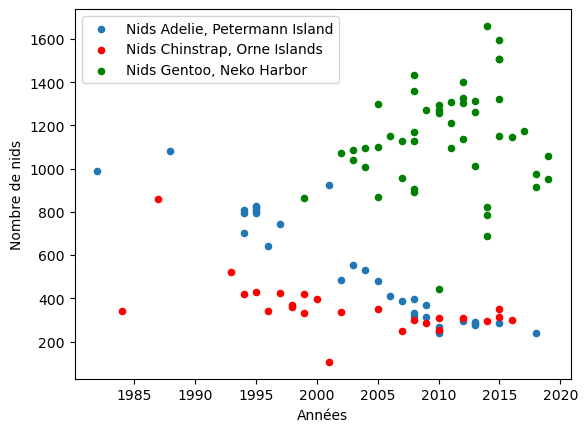

In [177]:
plot = pen_adelie.plot(kind='scatter', x='year', y='count', label = 'Nids Adelie, Petermann Island')
pen_chinstrap.plot(kind='scatter', x='year', y='count', label='Nids Chinstrap, Orne Islands', color='red', ax=plot)
pen_gentoo.plot(kind='scatter', x='year', y='count', label= 'Nids Gentoo, Neko Harbor', color='green', ax=plot)
plot.set_xlabel("Années")
plot.set_ylabel("Nombre de nids")
plt.show()

On observe que le nombre de nids de 2 espèces sur les 3 sont en fort déclin en 40 ans, tandis qu'une autre semble croître.
Notamment, les deux espèces en déclin vivent sur des îles, la fonte des glaces se fait donc plus rapide, et l'environnement rétrécit plus vite.

A l'inverse, il semblerait que les manchots Gentoo vivant sur le continent principal puissent proliférer sans problème, soit car la fonte des glaces les impacte moins, soit cette espèce a besoin de moins de glace solide pour vivre.

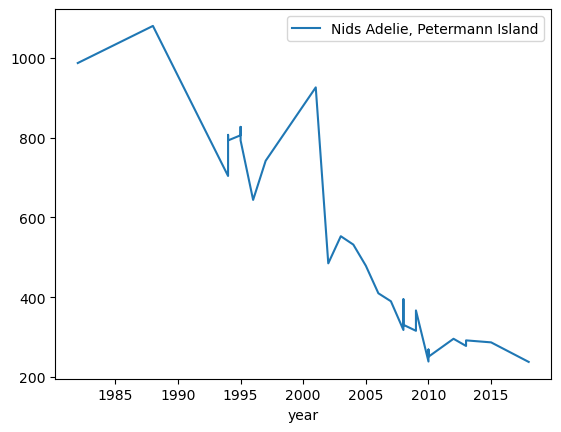

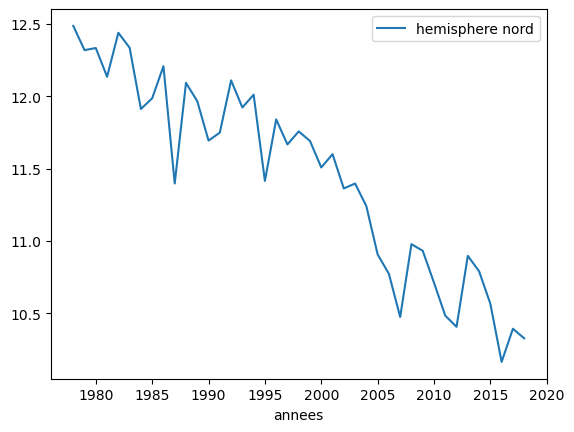

In [184]:
pen_adelie.plot(x='year', y='count', label = 'Nids Adelie, Petermann Island')
plt.show()
annees_ext.plot(x='annees', y='hemisphere nord')
plt.show()

Une ressemblance notable se remarque, entre la fonte des glaces de l'hémisphère Nord et la population des nids de manchots Adelie. Les manchots vivent dans l'hémisphère Sud, cependant les mesures de superficie de glace au Sud ne permettent pas une mise en relation avec un modèle comme établi plus haut. Cette observation permet d'établir que la fonte des glaces au Sud suit une tendance similaire, si ce n'est identique, à celle du Nord, et renforce le modèle des manchots.